In [0]:
import cv2

In [28]:
from google.colab import files
files.upload()

Saving image.jpg to image.jpg


{'image.jpg': b'\xff\xd8\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [3]:
!ls

jamie.jpg  sample_data


In [29]:
img = cv2.imread("image.jpg")
print(img.shape)

(640, 960, 3)


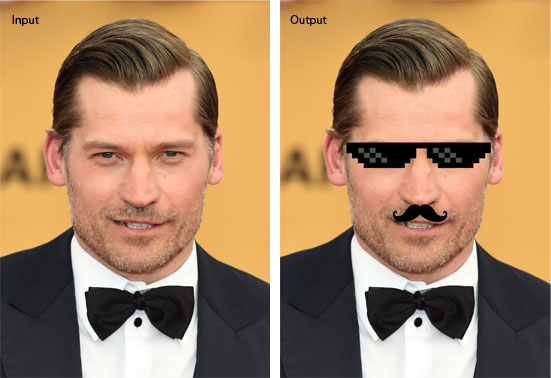

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [10]:
H,W,C = img.shape
print(H,W,C)

378 551 3


In [11]:
W2 = W//2
print(W2)

275


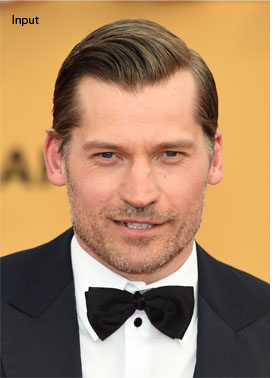

In [14]:
cropped_img = img[:,0:W2,:]
cv2_imshow(cropped_img)

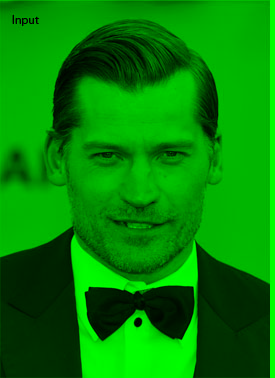

In [15]:
cropped_img[:,:,0] = 0
cropped_img[:,:,2] = 0

cv2_imshow(cropped_img)

In [17]:
# Face Detection
!wget https://www.dropbox.com/s/5o64ru428jlb29g/haarcascade_frontalface_alt.xml?dl=0

--2019-08-12 09:47:44--  https://www.dropbox.com/s/5o64ru428jlb29g/haarcascade_frontalface_alt.xml?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5o64ru428jlb29g/haarcascade_frontalface_alt.xml [following]
--2019-08-12 09:47:45--  https://www.dropbox.com/s/raw/5o64ru428jlb29g/haarcascade_frontalface_alt.xml
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd26fc1dfe2e4cdb5ffaba11111.dl.dropboxusercontent.com/cd/0/inline/Amcb2c6qW9S09aBGq-JyYDygRIfoybClNuzJ2-5ySjmBpN9Ne2o-7k_pXvas7Prh7DuSbmBnbVDi3h_hkmxVDa6rqRYGAF3qFbmovrHquwK_-w/file# [following]
--2019-08-12 09:47:45--  https://ucd26fc1dfe2e4cdb5ffaba11111.dl.dropboxusercontent.com/cd/0/inline/Amcb2c6qW9S09aBGq-JyYDygRIfoybClNuzJ2-5ySjmBpN9Ne2o-7k_pXvas7Prh7DuSbmBnb

In [18]:
!ls

'haarcascade_frontalface_alt.xml?dl=0'	 jamie.jpg   sample_data


In [0]:
!mv haarcascade_frontalface_alt.xml?dl=0   facedata.xml

In [20]:
!ls

facedata.xml  jamie.jpg  sample_data


In [0]:
# 1
face_detector = cv2.CascadeClassifier('facedata.xml')

In [30]:
# 2 - Do a Sliding Widnow to detect faces
faces = face_detector.detectMultiScale(img,1.3,5)
print(faces)

[[266 253  57  57]
 [400 250  55  55]
 [501 250  59  59]
 [791 258  60  60]
 [667 266  50  50]
 [153 269  57  57]]


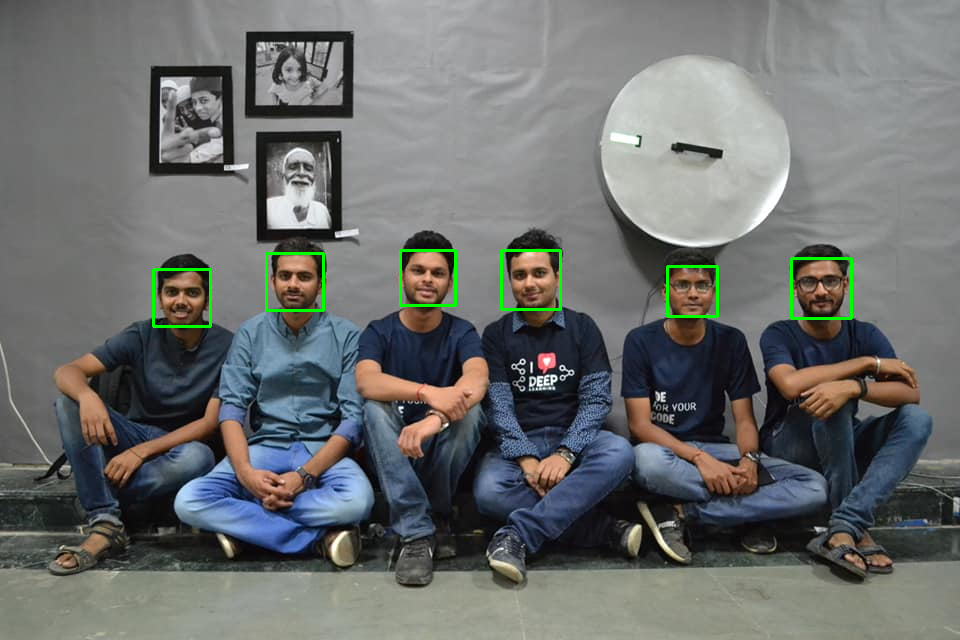

In [31]:
for face in faces:
    x,y,w,h = face
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
cv2_imshow(img)